In [27]:
import spacy
from rebel import spacy_component
import json
import pandas as pd
import time
import re
from tqdm import tqdm
from text_preprocessing import *
# import dask.bag as db

## Arxiv dataset

In [58]:
# docs = db.read_text('../data/arxiv-metadata-oai-snapshot.json').map(json.loads)
# data = docs.take(2054579)
# docs.count().compute()

In [3]:
def get_metadata():
    with open('../data/arxiv-metadata-oai-snapshot.json', 'r') as f:
        for line in f:
            yield line

In [4]:
metadata = get_metadata()

In [10]:
titles = []
ids = []
abstracts = []
authors_parsed = []
authors = []
years = []
for paper in tqdm(metadata):
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        year = int(ref[-4:]) 
        years.append(year)
        ids.append(paper_dict.get('id'))
        authors_parsed.append(paper_dict.get('authors_parsed'))
        authors.append(paper_dict.get('authors'))
        titles.append(paper_dict.get('title'))
        abstracts.append(paper_dict.get('abstract'))
    except Exception as e:
        # print(e)
        pass 



1725540it [00:26, 64663.07it/s]


In [13]:
papers = pd.DataFrame({
    'id' : ids,
    'title': titles,
    'authors': authors,
    'authors parsed': authors_parsed,
    'abstract': abstracts,
    'year': years
})
papers.head()

,id,title,authors,authors parsed,abstract,year
0,1203.3680,Self-exciting hurdle models for terrorist acti...,"Michael D. Porter, Gentry White","[[Porter, Michael D., ], [White, Gentry, ]]",A predictive model of terrorist activity is ...,-124
1,1203.3685,On almost free torus actions and Horrocks conj...,Yury Ustinovsky,"[[Ustinovsky, Yury, ]]",We construct a model for cohomology of a spa...,-107
2,1203.3692,On a nonlinear partial differential algebraic ...,"Martin Grothaus, Nicole Marheineke","[[Grothaus, Martin, ], [Marheineke, Nicole, ]]",In this paper we explore a numerical scheme ...,2015
3,1203.3693,Three strongly correlated charged bosons in a ...,Przemyslaw Koscik,"[[Koscik, Przemyslaw, ]]",We study a one-dimensional system composed o...,173
4,1203.3695,SubHaloes going Notts: The SubHalo-Finder Comp...,"Julian Onions, Alexander Knebe, Frazer R. Pear...","[[Onions, Julian, ], [Knebe, Alexander, ], [Pe...",We present a detailed comparison of the subs...,1214


In [21]:
papers.shape

(297996, 6)

In [15]:
# papers.to_pickle('../data/Arxiv/arxiv_papers_processed.pickle')

In [28]:
papers = pd.read_pickle('../data/Arxiv/arxiv_papers_processed.pickle')

In [35]:
papers.iloc[0,4]

'  A predictive model of terrorist activity is developed by examining the daily\nnumber of terrorist attacks in Indonesia from 1994 through 2007. The dynamic\nmodel employs a shot noise process to explain the self-exciting nature of the\nterrorist activities. This estimates the probability of future attacks as a\nfunction of the times since the past attacks. In addition, the excess of\nnonattack days coupled with the presence of multiple coordinated attacks on the\nsame day compelled the use of hurdle models to jointly model the probability of\nan attack day and corresponding number of attacks. A power law distribution\nwith a shot noise driven parameter best modeled the number of attacks on an\nattack day. Interpretation of the model parameters is discussed and predictive\nperformance of the models is evaluated.\n'

In [42]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f355ba410a0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f355b883460>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f355b8a7890>),
 ('rebel', <rebel.spacy_component.RebelComponent at 0x7f34e4dcc6a0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f35534e6080>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f355346ad40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f355b8a7c80>)]

### Relation extraction runs in cmd : ```run_rebel_arxiv.py```

### Extracted relations analysis

In [9]:
with open('./arxiv_rel_extracted_2k_docs.json', 'r') as fp:
    data = json.load(fp)

In [10]:
len(data)

7967

In [12]:
relation_types = list()
for i in tqdm(list(data.keys())[:-1], total=len(data.keys())):
    relation_types.append(data[i]['relation'])

100%|█████████▉| 7966/7967 [00:00<00:00, 622240.50it/s]


In [13]:
from collections import Counter
unique_relation_types_counter = dict(Counter(relation_types))

In [14]:
len(unique_relation_types_counter)

75

In [15]:
unique_relation_types_vc = dict(sorted(unique_relation_types_counter.items(), key=lambda t: t[1], reverse=True))

In [16]:
unique_relation_types_vc

{'subclass of': 2571,
 'part of': 1067,
 'has part': 795,
 'instance of': 744,
 'facet of': 586,
 'opposite of': 398,
 'studied by': 290,
 'studies': 202,
 'different from': 159,
 'use': 115,
 'uses': 115,
 'followed by': 107,
 'has effect': 100,
 'follows': 86,
 'has cause': 75,
 'said to be the same as': 63,
 'used by': 59,
 'named after': 55,
 'discoverer or inventor': 45,
 'point in time': 34,
 'notable work': 32,
 'field of work': 28,
 'has parts of the class': 25,
 'author': 20,
 'based on': 18,
 'main subject': 18,
 'country': 15,
 'product or material produced': 14,
 'student': 14,
 'student of': 11,
 'location': 8,
 'spouse': 8,
 'owned by': 7,
 'field of this occupation': 5,
 'influenced by': 5,
 'located in the administrative territorial entity': 4,
 'developer': 4,
 'operator': 4,
 'owner of': 4,
 'depicts': 4,
 'connects with': 4,
 'subsidiary': 3,
 'parent organization': 3,
 'publication date': 3,
 'contains administrative territorial entity': 2,
 'practiced by': 2,
 'sig

In [17]:
from matplotlib import pyplot as plt
import itertools

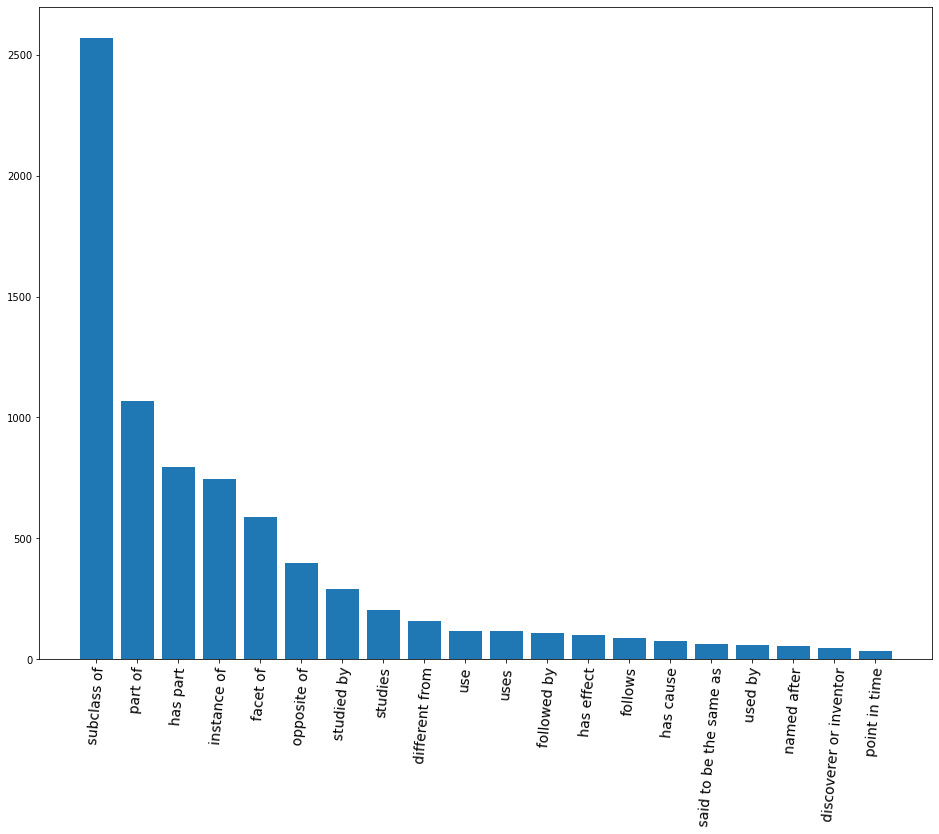

In [18]:
plt.figure(figsize=(16, 12))
plt.bar(*zip(*dict(itertools.islice(unique_relation_types_vc.items(), 20)).items()))
plt.xticks(rotation=85, fontsize=14)
plt.show()


In [25]:
example_rel_type = list()
for k, v in tqdm(list(data.items())[:-1], total=len(data.items())):
    if v['relation'] == ' of':
        example_rel_type.append((k, v))

100%|█████████▉| 7966/7967 [00:00<00:00, 608450.20it/s]


In [26]:
example_rel_type

[('We construct a model for cohomology of a space $X$ equipped with a torus $T$ action, whose homotopy orbit space $X_{T}$ is formal. This model represents Koszul complex of its equivariant cohomology. Studying homological properties of modules over polynomial ring we derive new bounds on homological rank dimension of cohomology ring of $X$ equipped with almost free torus action. We give a proof of toral rank conjecture for spaces with formal quotient in the case of torus dimension $ le5$.->(78, 8)',
  {'relation': 'part of', 'head': 'formal quotient', 'tail': 'space'}),
 ('New spherical scalar modes on the expanding part of Sitter spacetime, eigenfunctions of a conserved Hamiltonian like operator are found by solving the Klein Gordon equation in the appropriate coordinate chart, with the help of a time evolution picture technique specially developed for spatially flat FLRW charts. Transition coefficients are computed between these modes and the rest of the scalar spherical and plane w